In [68]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from six.moves import cPickle as pickle
import pandas as pd
import gzip
import seaborn as sns
import string
from time import time
import nltk
from nltk.corpus import stopwords 
#stops = set(stopwords.words("english"))

In [69]:
# Import the classifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap         # Visualization
import numpy as np                                   # Numerical operations
import matplotlib.pyplot as plt                      # Plotting
from sklearn.model_selection import train_test_split # Data splitting
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import itertools 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, decomposition, feature_extraction
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from nltk.corpus import brown
import collections
import operator
import math
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance
from sklearn.preprocessing import StandardScaler

In [70]:
import gzip
from collections import defaultdict

## Helpfulness baseline 
### Compute the global average helpfulness rate, and the average helpfulness rate for each user

In [71]:
def readGz(f):
  for l in gzip.open(f):
    yield eval(l)

allHelpful = []
userHelpful = defaultdict(list)

for l in readGz("train.json.gz"):
  user,item = l['reviewerID'],l['itemID']
  allHelpful.append(l['helpful'])
  userHelpful[user].append(l['helpful'])

averageRate = sum([x['nHelpful'] for x in allHelpful]) * 1.0 / sum([x['outOf'] for x in allHelpful])
userRate = {}
for u in userHelpful:
  totalU = sum([x['outOf'] for x in userHelpful[u]])
  if totalU > 0:
    userRate[u] = sum([x['nHelpful'] for x in userHelpful[u]]) * 1.0 / totalU
  else:
    userRate[u] = averageRate

predictions = open("predictions_Helpful.txt", 'w')
for l in open("pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  if u in userRate:
    predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*userRate[u]) + '\n')
  else:
    predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*averageRate) + '\n')

predictions.close()

In [72]:
averageRate

0.8519720886532813

In [73]:
userHelpful

defaultdict(list,
            {'U745881038': [{'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 2, 'nHelpful': 2}],
             'U023577405': [{'outOf': 0, 'nHelpful': 0},
              {'outOf': 6, 'nHelpful': 6},
              {'outOf': 1, 'nHelpful': 1},
              {'outOf': 1, 'nHelpful': 1},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0}],
             'U441384838': [{'outOf': 2, 'nHelpful': 2},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 5, 'nHelpful': 3},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 5, 'nHelpful': 5}],
             'U654041297': [{'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0}],
             'U096604734': [{'outOf': 1, 'nHelpful': 1},
     

## For reading the files in a pandas Dataframe.

In [74]:
import pandas as pd
from collections import defaultdict

def readGz(f):
    for l in gzip.open(f):
        yield eval(l)

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('train.json.gz')
test_df = getDF('test_Helpful.json.gz')

In [75]:
df.head(5)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,helpful,price
0,0,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",I655355328,U745881038,3.0,"These are cute, but they are a little small. ...",R115160670,"05 20, 2014",Cute,1400544000,"{'outOf': 0, 'nHelpful': 0}",NaN
1,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I241092314,U023577405,4.0,"I love the look of this bra, it is what I want...",R800651687,"02 7, 2013",Beautiful but size runs small,1360195200,"{'outOf': 0, 'nHelpful': 0}",NaN
2,0,"[[Clothing, Shoes & Jewelry, Wedding Party Gif...",I408260822,U441384838,3.0,it's better on a man's hand.I didn't find it v...,R345042616,"05 13, 2014",Good price but...,1399939200,"{'outOf': 2, 'nHelpful': 2}",19.99
3,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I770448753,U654041297,4.0,Comfortable and easy to wear for a day of shop...,R875466866,"05 25, 2014","Easy, breezy",1400976000,"{'outOf': 0, 'nHelpful': 0}",14.95
4,0,"[[Clothing, Shoes & Jewelry, Women, Plus-Size,...",I919238161,U096604734,5.0,I'm quite small and the XS fits me like a regu...,R317526520,"07 30, 2013",Great shirt,1375142400,"{'outOf': 1, 'nHelpful': 1}",NaN


In [76]:
df[df['rating']==1].head(30)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,helpful,price
16,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I772066752,U260628163,1.0,"I bought a black and a white top, which would ...",R540976304,"12 7, 2013",Small and smelly,1386374400,"{'outOf': 0, 'nHelpful': 0}",12.98
34,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I049596334,U833084343,1.0,I bought this solely based on reviews. Firstly...,R419458447,"02 1, 2014",Really bad,1391212800,"{'outOf': 9, 'nHelpful': 9}",NaN
42,0,"[[Clothing, Shoes & Jewelry, Women, Watches, W...",I338121980,U452285415,1.0,"the finish wears off very quickly, like within...",R426689720,"05 3, 2013",Cheap,1367539200,"{'outOf': 1, 'nHelpful': 0}",5.95
246,0,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",I261571553,U386153151,1.0,"eh...not one of my best purchases, but it will...",R143234721,"01 22, 2014",Cheap,1390348800,"{'outOf': 0, 'nHelpful': 0}",2.78
247,1,"[[Sports & Outdoors, Clothing, Men, Socks], [C...",I639001549,U647099987,1.0,I've purchased Hanes crew socks for many years...,R769507065,"04 15, 2013",not what they used to be,1365984000,"{'outOf': 3, 'nHelpful': 3}",NaN
248,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I002204705,U076282096,1.0,Very unflattering. Too long; too baggy; too ug...,R041033233,"10 25, 2013",Bad,1382659200,"{'outOf': 3, 'nHelpful': 2}",NaN
261,0,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",I496363818,U199987360,1.0,"After reading all good reviews, I bought this ...",R675130902,"11 11, 2012",very disappointed,1352592000,"{'outOf': 0, 'nHelpful': 0}",NaN
299,1,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",I699973219,U637779172,1.0,I loved these shoes at first. Gave them five ...,R677277415,"10 4, 2012","Great for 3 months, then trashed!",1349308800,"{'outOf': 1, 'nHelpful': 0}",NaN
304,0,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",I567554935,U437516268,1.0,cheaply made and doesnt fit right on your wris...,R378873690,"07 10, 2014",... your wrist would not waist my money on thi...,1404950400,"{'outOf': 1, 'nHelpful': 0}",4.48
318,0,"[[Clothing, Shoes & Jewelry, L, Leg Avenue], [...",I438395524,U069691497,1.0,This set is pretty flimsy. The garter especia...,R669636443,"12 18, 2013",Flimsy and ultimately not durable,1387324800,"{'outOf': 0, 'nHelpful': 0}",NaN


In [77]:
df.shape

(200000, 12)

In [78]:
test_df.head()

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,helpful,price
0,0,"[[Sports & Outdoors, Other Sports, Dance, Clot...",I520932398,U816789534,3.0,I ordered according to the size chart but it's...,R157684793,"07 15, 2011",Too small,1310688000,{'outOf': 2},NaN
1,0,"[[Sports & Outdoors, Clothing, Women, Hoodies]...",I969532331,U987148846,4.0,Super thin but really cute and not cheap-looki...,R732719858,"07 17, 2013",Fun hoodie,1374019200,{'outOf': 0},NaN
2,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I149943341,U628436634,5.0,"It was a present for my sis, and she loves Fle...",R352659313,"12 8, 2013",A Perfect hook up,1386460800,{'outOf': 1},NaN
3,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I909025835,U924107228,5.0,I love this thing! I guess they don't make th...,R277416618,"11 22, 2012",I love this thing...,1353542400,{'outOf': 1},7.51
4,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I228439768,U060135484,4.0,I liked it and I wear it...it's a little bit s...,R645892076,"04 1, 2014",I liked it...,1396310400,{'outOf': 0},NaN


In [79]:
test_df.shape

(14000, 12)

In [80]:
#1. Define function to get the first review time for each item
def first_review_time(data_df):
    time_dict = {}
    for i in range(len(data_df)):
        pid = data_df['itemID'][i]
        #print (pid)
        time_i = data_df['reviewTime'][i]
        if pid in time_dict:
            if time_i < time_dict[pid]:
                time_dict[pid] = time_i
        else:
            time_dict[pid] = time_i
    data_df['firstReviewTime'] = data_df['itemID'].map(time_dict).values
    return data_df
# convert reviewTime to datatime data type
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df = first_review_time(df)
df['review_first_dif'] = (df['reviewTime'] - df['firstReviewTime']).astype('timedelta64[D]')
test_df['reviewTime'] = pd.to_datetime(test_df['reviewTime'])
test_df = first_review_time(test_df)
test_df['review_first_dif'] = (test_df['reviewTime'] - test_df['firstReviewTime']).astype('timedelta64[D]')

In [81]:
#2. Rating score deviation from mean
def deviation_mean(data_df):
    rating_mean_dict = data_df['rating'].groupby(data_df['itemID']).mean().to_dict()
    data_df['rating_mean'] = data_df['itemID'].map(rating_mean_dict).values
    data_df['rating_mean_dev'] = data_df['rating'] - data_df['rating_mean']
    return data_df['rating_mean_dev']
df['rating_mean_dev'] = deviation_mean(df)
test_df['rating_mean_dev'] = deviation_mean(test_df)

In [82]:
#3. Number of words of each review text
df['reviewWords'] = df['reviewText'].apply(lambda x: len(x.split()))
test_df['reviewWords'] = test_df['reviewText'].apply(lambda x: len(x.split()))

In [83]:
#4. Number of words of each review summary
df['summaryWords'] = df['summary'].apply(lambda x: len(x.split()))
test_df['summaryWords'] = test_df['summary'].apply(lambda x: len(x.split()))
#df.head(5)

In [84]:
#5. Ratio of summary words to review text words
df['ratiosuWord'] = df['summaryWords'] / df['reviewWords']
test_df['ratiosuWord'] = test_df['summaryWords'] / test_df['reviewWords']

In [85]:
#6. Number of sentences of each review text
def count_sentence(data_df, text):
    pun_sen = ['.', '!', '?']
    text_col = data_df[text]
    sentence_counts = []
    for i in text_col:
        sentence_count = []
        for j in pun_sen:
            count_a = i.count(j)
            sentence_count.append(count_a)
        sentence_counts.append(sum(sentence_count))
    data_df['reviewSentences'] = sentence_counts
    return data_df['reviewSentences']
df['reviewSentences'] = count_sentence(df, 'reviewText')
test_df['reviewSentences'] = count_sentence(test_df, 'reviewText')

In [86]:
#7. Number of characters of each review text
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['reviewText']
    for i in text_col:
        a = dict(collections.Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
df['reviewChars'] = count_characters(df)
test_df['reviewChars'] = count_characters(test_df)
#df.head(5)

In [87]:
#punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
#lowercase_words = [x.lower() for x in brown.words()]
#punctuation_stopwords = punctuation + stopwords.words('english')
#filtered_words = [x for x in lowercase_words if x not in punctuation_stopwords]
#final_filtered_words = list(filter(lambda x: x.isalpha() and len(x) > 1, filtered_words))

In [88]:
#8. Readability of each review (ARI as index to measure)
def readability(data_df):
    wordperSen = []
    charperWord = []
    reviewRead = []
    len_df = len(data_df)
    a = list(data_df['reviewWords'])
    b = list(data_df['reviewSentences'])
    c = list(data_df['reviewChars'])
    for i in range(len_df):
        if b[i] == 0:
            wordperSen.append(0)
        else:
            j = a[i] / b[i]
            wordperSen.append(j)
        if a[i] == 0:
            charperWord.append(0)
        else:
            l = c[i] / a[i]
            charperWord.append(l)
        ari = 4.71 * charperWord[i] + 0.5 * wordperSen[i] - 21.43
        reviewRead.append(ari)
    data_df['reviewRead'] = reviewRead
    return data_df['reviewRead']
df['reviewRead'] = readability(df)
test_df['reviewRead'] = readability(df)

In [89]:
#9. Number of punctuations of each review text
def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['reviewText']:
        a = dict(collections.Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
df['reviewPuncts'] = numpunct(df)
test_df['reviewPuncts'] = numpunct(test_df)

In [90]:
#10. Ratio of punctuations with characters
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
df['ratiopunChar'] = ratio_puncts_chars(df)
test_df['ratiopunChar'] = ratio_puncts_chars(test_df)

In [91]:
#11. Number of capital words of each review text
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['reviewText']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
df['reviewCwords'] = numcapwords(df)
test_df['reviewCwords'] = numcapwords(test_df)

In [92]:
#12. Number of capital words of each summary
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['summary']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['summaryCwords'] = reviewCwords
    return data_df['summaryCwords']
df['summaryCwords'] = numcapwords(df)
test_df['summaryCwords'] = numcapwords(test_df)

In [93]:
import re
#13. Number of exclimation and question marks of each review text
def numexclquest(data_df):
    suexcqueMarks = []
    for i in data_df['reviewText']:
        a = re.findall(r'[!?]', i)
        suexcqueMarks.append(len(a))
    data_df['numexclquest'] = suexcqueMarks
    return data_df['numexclquest']
df['numexclquest'] = numexclquest(df)
test_df['numexclquest'] = numexclquest(test_df)

In [94]:
#14. Number of exclimation and question marks of each summary text
def numexclquest(data_df):
    suexcqueMarks = []
    for i in data_df['summary']:
        a = re.findall(r'[!?]', i)
        suexcqueMarks.append(len(a))
    data_df['sunumexclquest'] = suexcqueMarks
    return data_df['sunumexclquest']
df['sunumexclquest'] = numexclquest(df)
test_df['sunumexclquest'] = numexclquest(test_df)

In [95]:
#15. Number of reviews of each product (measure the popularity of each product)
def numreviewPro(data_df):
    itemid_dict = data_df.groupby('itemID')['itemID'].count().to_dict()
    data_df['numreviewPro'] = data_df['itemID'].map(itemid_dict).values
    return data_df['numreviewPro']
df['numreviewPro'] = numreviewPro(df)
test_df['numreviewPro'] = numreviewPro(test_df)

In [96]:
#16. Number of reviews of each reviewers (measure reviewer’s experience)
def numreviewPro(data_df):
    itemid_dict = data_df.groupby('reviewerID')['reviewerID'].count().to_dict()
    data_df['numreviews'] = data_df['reviewerID'].map(itemid_dict).values
    return data_df['numreviews']
df['numreviews'] = numreviewPro(df)
test_df['numreviews'] = numreviewPro(test_df)

In [97]:
#17. Breaking up helpful column into two features
df['helpful_numerator'] = df['helpful'].apply(lambda x: x['nHelpful'])

df['helpful_denominator'] = df['helpful'].apply(lambda x: x['outOf'])
test_df['helpful_denominator'] = test_df['helpful'].apply(lambda x: x['outOf'])

df['helpratio'] = df['helpful_numerator'] / df['helpful_denominator']
df['helpratio'] = df['helpratio'].fillna(0)
test_df.head(5)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,...,reviewRead,reviewPuncts,ratiopunChar,reviewCwords,summaryCwords,numexclquest,sunumexclquest,numreviewPro,numreviews,helpful_denominator
0,0,"[[Sports & Outdoors, Other Sports, Dance, Clot...",I520932398,U816789534,3.0,I ordered according to the size chart but it's...,R157684793,2011-07-15,Too small,1310688000,...,7.138750,5,0.035211,1,0,0,0,2,1,2
1,0,"[[Sports & Outdoors, Clothing, Women, Hoodies]...",I969532331,U987148846,4.0,Super thin but really cute and not cheap-looki...,R732719858,2013-07-17,Fun hoodie,1374019200,...,9.636842,5,0.035971,0,0,0,0,1,1,0
2,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I149943341,U628436634,5.0,"It was a present for my sis, and she loves Fle...",R352659313,2013-12-08,A Perfect hook up,1386460800,...,8.615357,3,0.027523,0,1,0,0,1,2,1
3,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I909025835,U924107228,5.0,I love this thing! I guess they don't make th...,R277416618,2012-11-22,I love this thing...,1353542400,...,11.541290,23,0.035770,2,1,1,0,2,2,1
4,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I228439768,U060135484,4.0,I liked it and I wear it...it's a little bit s...,R645892076,2014-04-01,I liked it...,1396310400,...,12.907208,13,0.073446,4,1,0,0,4,1,0


In [98]:
#df_less = df.drop(columns = ['categoryID', 'categories', 'reviewerID','reviewText','reviewHash','reviewTime','summary','unixReviewTime','helpful','firstReviewTime'], axis = 1)
#train_df['helpratio'] = train_df['nHelpful'] / train_df['outOf']
#test_df_less = test_df.drop(columns = ['categoryID', 'categories', 'reviewerID', 'reviewText','reviewHash','reviewTime','summary','unixReviewTime', 'firstReviewTime','helpful'])
#df_less.corr

In [99]:
#Define helpful_overall as a binary variable with 0.75 helpratio as 1 o/w 0. Filter out those with 0 input.
threshold = 0
df['threshold'] = df['helpful_denominator'].apply(lambda x: 1 if x>0 else 0)
df['helpful_overall'] = np.where(df.loc[:, 'helpratio']> .8, 1, 0)
df = df[df['helpful_denominator']<50]
#df1.loc[:, 'Helpful'] = np.where(df.loc[:, 'helpful_numerator'] / df.loc[:, 'helpful_denominator'] > threshold, 1, 0)
#df1 = df.loc[df['helpful_overall']==1]
df1 = df.loc[df['threshold'] > threshold]
df1.head(5)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,...,summaryCwords,numexclquest,sunumexclquest,numreviewPro,numreviews,helpful_numerator,helpful_denominator,helpratio,threshold,helpful_overall
2,0,"[[Clothing, Shoes & Jewelry, Wedding Party Gif...",I408260822,U441384838,3.0,it's better on a man's hand.I didn't find it v...,R345042616,2014-05-13,Good price but...,1399939200,...,0,0,0,12,5,2,2,1.0,1,1
4,0,"[[Clothing, Shoes & Jewelry, Women, Plus-Size,...",I919238161,U096604734,5.0,I'm quite small and the XS fits me like a regu...,R317526520,2013-07-30,Great shirt,1375142400,...,0,1,0,8,5,1,1,1.0,1,1
5,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I098334555,U481392145,4.0,This bra help up my extra large girls (44DDD) ...,R228312599,2013-08-09,Surprisingly comfortable,1376006400,...,0,0,0,164,6,1,1,1.0,1,1
14,3,"[[Clothing, Shoes & Jewelry, W, Western Chief]...",I271970438,U389466867,4.0,Got 3T for average sz 2.5 yr old. Looks small....,R711451772,2014-01-10,Good quality rain jacket,1389312000,...,0,0,0,6,9,1,1,1.0,1,1
20,0,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",I150236675,U867387122,5.0,"Love the boots, I wear a size 7 and they are t...",R868780146,2012-09-08,This years new pair,1347062400,...,0,0,0,11,5,1,1,1.0,1,1


In [100]:
#df2 = df1.drop(columns = ['reviewHash','reviewTime','unixReviewTime','firstReviewTime'], axis = 1)
#df2.head(5)

,categoryID,categories,itemID,reviewerID,rating,reviewText,summary,helpful,price,review_first_dif,...,summaryCwords,numexclquest,sunumexclquest,numreviewPro,numreviews,helpful_numerator,helpful_denominator,helpratio,threshold,helpful_overall
2,0,"[[Clothing, Shoes & Jewelry, Wedding Party Gif...",I408260822,U441384838,3.0,it's better on a man's hand.I didn't find it v...,Good price but...,"{'outOf': 2, 'nHelpful': 2}",19.99,485.0,...,0,0,0,12,5,2,2,1.0,1,1
4,0,"[[Clothing, Shoes & Jewelry, Women, Plus-Size,...",I919238161,U096604734,5.0,I'm quite small and the XS fits me like a regu...,Great shirt,"{'outOf': 1, 'nHelpful': 1}",NaN,218.0,...,0,1,0,8,5,1,1,1.0,1,1
5,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I098334555,U481392145,4.0,This bra help up my extra large girls (44DDD) ...,Surprisingly comfortable,"{'outOf': 1, 'nHelpful': 1}",NaN,1955.0,...,0,0,0,164,6,1,1,1.0,1,1
14,3,"[[Clothing, Shoes & Jewelry, W, Western Chief]...",I271970438,U389466867,4.0,Got 3T for average sz 2.5 yr old. Looks small....,Good quality rain jacket,"{'outOf': 1, 'nHelpful': 1}",NaN,25.0,...,0,0,0,6,9,1,1,1.0,1,1
20,0,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",I150236675,U867387122,5.0,"Love the boots, I wear a size 7 and they are t...",This years new pair,"{'outOf': 1, 'nHelpful': 1}",NaN,0.0,...,0,0,0,11,5,1,1,1.0,1,1


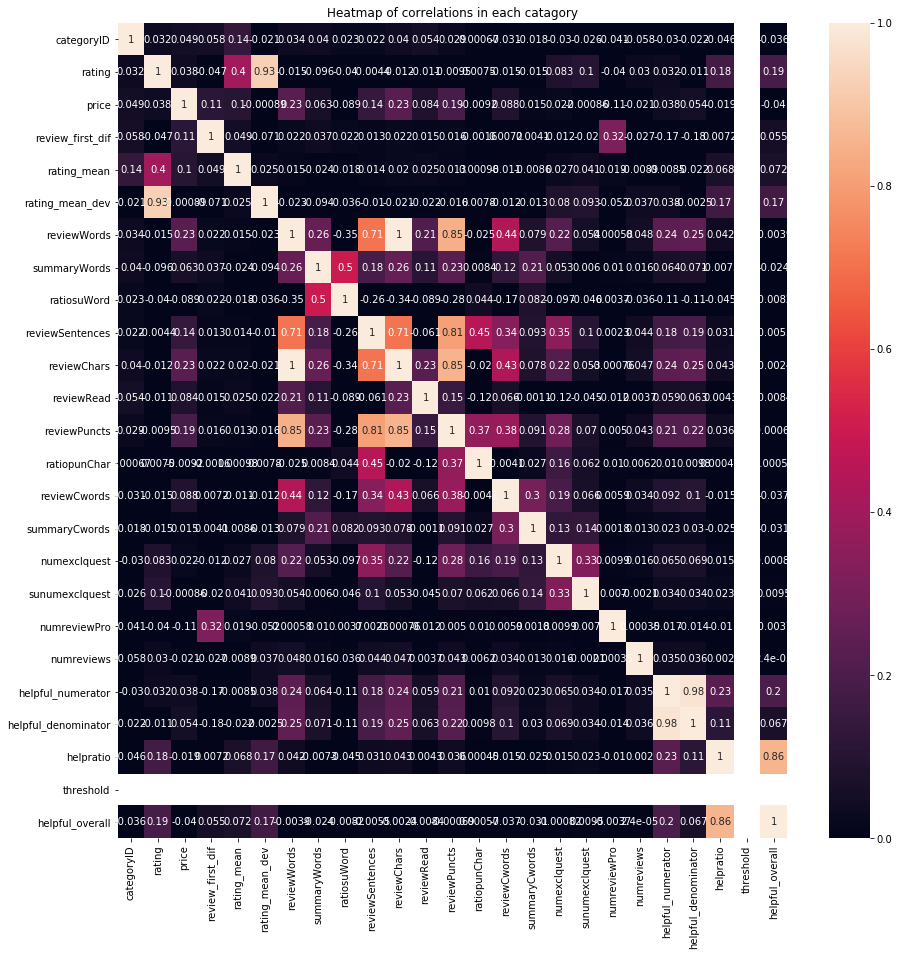

In [101]:
correlations = df1.corr()
plt.figure(figsize = (15,15))
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations, vmin=0, vmax=1, annot=True)

In [102]:
df3 = df2[['rating','rating_mean_dev','reviewText','summary','reviewChars', 'reviewWords', 'helpful_numerator','helpful_denominator','helpratio','helpful_overall','threshold']]
df3 = df[['rating','reviewText','unixReviewTime','outOf', 'reviewWords','summaryCwords','ratiosuWords','suexcqueMarks', 'numreviewPro','numReviews']]
#df3['combined_text'] = df3['reviewText'] + df3['summary']
#test_df['combined_text'] = test_df['reviewText'] + test_df['summary']
df3.loc[:, 'reviewText'] = df3['reviewText'].str.lower()
test_df.loc[:, 'reviewText'] = test_df['reviewText'].str.lower()
df3

,rating,rating_mean_dev,reviewText,summary,reviewChars,reviewWords,helpful_numerator,helpful_denominator,helpratio,helpful_overall,threshold
2,3.0,-1.083333,it's better on a man's hand.i didn't find it v...,Good price but...,137,28,2,2,1.0,1,1
4,5.0,0.500000,i'm quite small and the xs fits me like a regu...,Great shirt,404,77,1,1,1.0,1,1
5,4.0,0.024390,this bra help up my extra large girls (44ddd) ...,Surprisingly comfortable,456,80,1,1,1.0,1,1
14,4.0,-0.833333,got 3t for average sz 2.5 yr old. looks small....,Good quality rain jacket,386,83,1,1,1.0,1,1
20,5.0,0.181818,"love the boots, i wear a size 7 and they are t...",This years new pair,129,29,1,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
199979,5.0,0.333333,i love this hat. it is the cutest and so soft...,Cuter than expected,115,24,2,2,1.0,1,1
199984,5.0,0.812500,this is perfect to dress up or down. the semi ...,I love this shirt.,416,77,1,1,1.0,1,1
199992,4.0,-0.571429,these boots felt great even out of the box! i...,Very comfortable but not for thin orthotics,506,98,0,1,0.0,0,1
199996,2.0,-2.384615,"i've used my yaktrax maybe 10 times, 4 of them...","Would be good for walking, not running",738,148,0,1,0.0,0,1


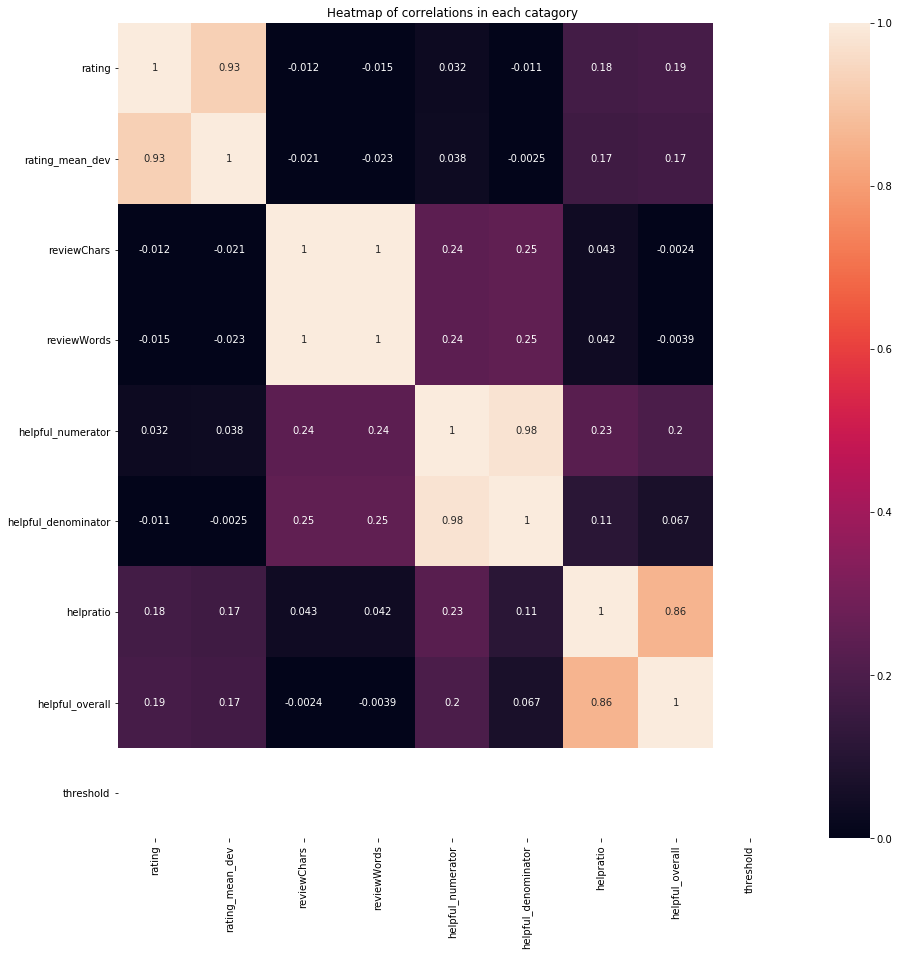

In [103]:
correlations1 = df3.corr()
plt.figure(figsize = (15,15))
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations1, vmin=0, vmax=1, annot=True)

In [104]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

#create a stemmer
stemmer = SnowballStemmer("english")


#define our own tokenizing function that we will pass into the TFIDFVectorizer. We will also stem the words here.
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems


#define the vectorizer
vectorizer = TfidfVectorizer(tokenizer = tokens, lowercase=True,smooth_idf=True, stop_words= set(stopwords.words('english')), ngram_range=(1, 1), min_df = 0.001)
#stop_words = 'english'
#fit the vectorizers to the data.
vectorizer_scalar = vectorizer.fit(df3['reviewText'])
features_train = vectorizer_scalar.transform(df3['reviewText'])
features_test = vectorizer_scalar.transform(test_df['reviewText'])
features_train

<62616x3391 sparse matrix of type '<class 'numpy.float64'>'
	with 1828185 stored elements in Compressed Sparse Row format>

In [105]:
features_test

<14000x3391 sparse matrix of type '<class 'numpy.float64'>'
	with 328933 stored elements in Compressed Sparse Row format>

In [106]:
features_train

<62616x3391 sparse matrix of type '<class 'numpy.float64'>'
	with 1828185 stored elements in Compressed Sparse Row format>

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features_train,df3['helpful_overall'], test_size=0.2, random_state=42)

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on roc_auc score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    probas = clf.predict_proba(features)
    pred = clf.predict(x_te)
    end = time()
    
    # Print and return results
    print("Test accuracy for model = ", accuracy_score(y_val,pred))
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return roc_auc_score(target.values, probas[:,1].T)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on roc_auc score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("ROC_AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("ROC_AUC score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))
    
def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [109]:
# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Initialize the models using a random state were applicable.
clf_list = [GaussianNB(), 
            AdaBoostClassifier(random_state = 42), 
            RandomForestClassifier(random_state = 42), 
            LogisticRegression(random_state = 42)]
            #DecisionTreeClassifier(random_state = RAN_STATE)]
x_tr = X_train.toarray()
x_te = X_val.toarray()


# Set up the training set sizes for 100, 200 and 300 respectively.
train_feature_list = [x_tr[0:10000],x_tr[0:20000],x_tr]
train_target_list = [y_train[0:10000], y_train[0:20000], y_train]


# Execute the 'train_predict' function for each of the classifiers and each training set size
for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        train_predict(clf, a, b, x_te, y_val)

Training a GaussianNB using a training set size of 10000. . .
Trained model in 0.7761 seconds
Test accuracy for model =  0.5092622165442351
Made predictions in 1.9772 seconds.
ROC_AUC score for training set: 0.7697.
Test accuracy for model =  0.5092622165442351
Made predictions in 2.1698 seconds.
ROC_AUC score for test set: 0.5392.

Training a GaussianNB using a training set size of 20000. . .
Trained model in 1.5010 seconds
Test accuracy for model =  0.5423187480038326
Made predictions in 3.1153 seconds.
ROC_AUC score for training set: 0.7035.
Test accuracy for model =  0.5423187480038326
Made predictions in 2.1977 seconds.
ROC_AUC score for test set: 0.5433.

Training a GaussianNB using a training set size of 50092. . .
Trained model in 4.6254 seconds
Test accuracy for model =  0.5574896199297349
Made predictions in 5.9290 seconds.
ROC_AUC score for training set: 0.6439.
Test accuracy for model =  0.5574896199297349
Made predictions in 2.1392 seconds.
ROC_AUC score for test set: 0.56

In [110]:
#add Score column to features
import scipy as scipy

rating = np.array(list(df3.rating))
rating = rating.reshape(features_train.shape[0], 1)

features1 = scipy.sparse.hstack((features_train,scipy.sparse.csr_matrix(rating)))

features2 = scipy.sparse.csr_matrix(features1)
features2

<62616x3392 sparse matrix of type '<class 'numpy.float64'>'
	with 1890801 stored elements in Compressed Sparse Row format>

In [111]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(features_train, df3['helpful_overall'], test_size=0.2, random_state=42)

In [112]:
from sklearn.model_selection import learning_curve, GridSearchCV, StratifiedKFold
from sklearn.svm.libsvm import cross_validation
#make the grid search object
gs2 = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**i for i in range(-5,5)], 'class_weight': [None, 'balanced']},
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc'
)

#fit the grid search object to our new dataset
print ('Fitting grid search...')
gs2.fit(X_train2, y_train2)
print ("Grid search fitted.")

Fitting grid search...
Grid search fitted.


In [113]:
#print the grid search scores.
print (gs2.best_estimator_)
gs2.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

ROC_AUC Score: 0.6147536089348052
Test Accuracy: 0.6682369849888214


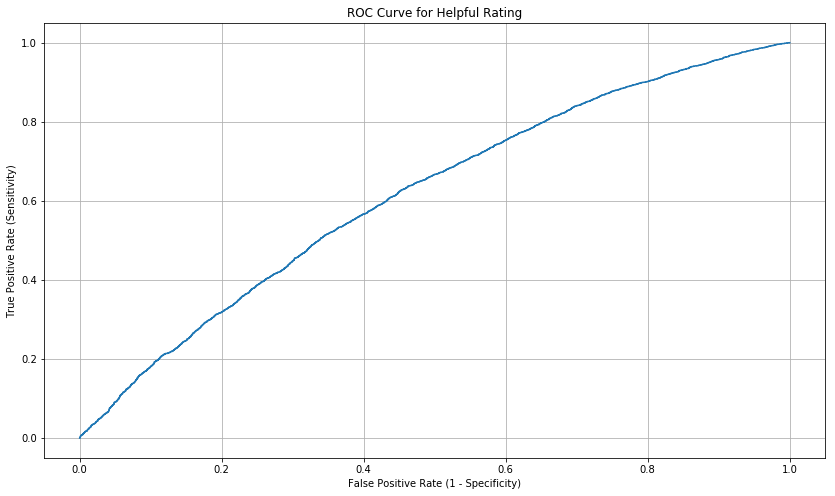

In [114]:
clf2 = gs2.best_estimator_
probas2 =clf2.predict_proba(X_val2)
pred2 = clf2.predict(X_val2.toarray())
plt.figure(figsize = (14,8))
plt.plot(roc_curve(y_val2, probas2[:,1])[0], roc_curve(y_val2, probas2[:,1])[1])
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show

# ROC/AUC score
print ('ROC_AUC Score:',roc_auc_score(y_val2, probas2[:,1].T))
print("Test Accuracy:", accuracy_score(y_val2,pred2))

In [115]:
clf2.coef_

array([[-0.0976922 , -0.16131391, -0.21971927, ...,  0.09444216,
         0.07797933,  0.0518894 ]])

In [116]:
probas3 =clf2.predict_proba(features_test.toarray())
probas3

array([[0.34568767, 0.65431233],
       [0.35651484, 0.64348516],
       [0.424711  , 0.575289  ],
       ...,
       [0.27799584, 0.72200416],
       [0.25353454, 0.74646546],
       [0.25618817, 0.74381183]])

In [117]:
len(probas3)

14000

In [118]:
pred_test = clf2.predict(features_test.toarray())
print(pred_test)

[1 1 1 ... 1 1 1]


In [119]:
pred_test.shape

(14000,)

In [120]:
import warnings
warnings.filterwarnings("ignore")

In [121]:
int(test_df.loc[counter_test-1,'helpful_denominator'].item())*pred_test[counter_test-1]
int(round(int(test_df.loc[counter_test-1,'helpful_denominator'].item())*probas3[counter_test-1][1],0))

1

In [122]:
counter_test = 0
prediction_values = []
for i in test_df['helpful_denominator']:
    if i == 0:
        prediction_values.append(0)
    elif i == 1:
        if test_df.loc[counter_test,['rating']].item() >=3:
            prediction_values.append(1)
        else:
            prediction_values.append(0)
    elif i == 2:
        if test_df.loc[counter_test,['rating']].item() >=3:
            prediction_values.append(2)
        else:
            prediction_values.append(int(round(i*probas3[counter_test][1],0)))
    elif test_df.loc[counter_test,['rating']].item() ==5:
        prediction_values.append(max(i,i*pred_test[counter_test]))
    elif test_df.loc[counter_test,['rating']].item() ==4:
        prediction_values.append(max(i,i*pred_test[counter_test]))
    #elif test_df.loc[counter_test,['rating']].item() ==1:
    #    if probas3[counter_test][1] < .5:
    #        prediction_values.append(0)
    #    else:
    #        prediction_values.append(int(round(i*probas3[counter_test][1],0)))
    #elif probas3[counter_test][1] <= .5:
    #    prediction_values.append(int(round(i*probas3[counter_test][0],0)))
    #elif probas3[counter_test][1] <=.65:
        #print(probas3[counter_test][1])
    #    prediction_values.append(int(round(i*probas3[counter_test][1],0)))
    else:
        prediction_values.append(max(i*pred_test[counter_test],int(round(i*probas3[counter_test][1],0))))
    counter_test += 1
prediction_values

[2,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 2,
 0,
 7,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 9,
 0,
 0,
 9,
 0,
 5,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 10,
 1,
 0,
 0,
 1,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 17,
 1,
 0,
 0,
 0,
 2,
 8,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 3,
 3,
 3,
 81,
 2,
 1,
 0,
 1,
 6,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 95,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 4,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 2,
 1,
 0,
 0,
 0,
 2,
 5,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 4,
 3,
 0,
 0,
 0,
 2,
 17,
 1,
 2,
 0,
 5,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [123]:
#counter_test = 0
#prediction_values = []
#for i in test_df['helpful_denominator']:
#    if i == 0:
#    #    print(i)
#        prediction_values.append(0)
#    else:
#     #   print(i)
#        prediction_values.append(i*pred_test[counter_test])
#    counter_test += 1
#prediction_values

In [124]:
#test_df = test_df.drop(columns=['predictions'])
#test_df.head(5)

In [125]:
test_df['predictions'] = prediction_values
test_df.head()

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,...,reviewPuncts,ratiopunChar,reviewCwords,summaryCwords,numexclquest,sunumexclquest,numreviewPro,numreviews,helpful_denominator,predictions
0,0,"[[Sports & Outdoors, Other Sports, Dance, Clot...",I520932398,U816789534,3.0,i ordered according to the size chart but it's...,R157684793,2011-07-15,Too small,1310688000,...,5,0.035211,1,0,0,0,2,1,2,2
1,0,"[[Sports & Outdoors, Clothing, Women, Hoodies]...",I969532331,U987148846,4.0,super thin but really cute and not cheap-looki...,R732719858,2013-07-17,Fun hoodie,1374019200,...,5,0.035971,0,0,0,0,1,1,0,0
2,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I149943341,U628436634,5.0,"it was a present for my sis, and she loves fle...",R352659313,2013-12-08,A Perfect hook up,1386460800,...,3,0.027523,0,1,0,0,1,2,1,1
3,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I909025835,U924107228,5.0,i love this thing! i guess they don't make th...,R277416618,2012-11-22,I love this thing...,1353542400,...,23,0.035770,2,1,1,0,2,2,1,1
4,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I228439768,U060135484,4.0,i liked it and i wear it...it's a little bit s...,R645892076,2014-04-01,I liked it...,1396310400,...,13,0.073446,4,1,0,0,4,1,0,0


In [126]:
counter = 0
predictions = open("predictions_Helpful_testdfLR19.txt", 'w')
for l in open("pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  #for pred in b:
  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(test_df.loc[counter,'predictions']) + '\n')
  counter +=1
  #else:
  #  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*averageRate) + '\n')
predictions.close()

In [59]:
#b #1st predictions
#prediction_values3 #3nd best
#prediction_values4
#prediction_values5
#prediction_values6 #2st best
#prediction_values7
#prediction_values8
#prediction_values9
#prediction_values10 #Best